# Project 6 $\cdot$ Julian Nowaczek

Setup environment:

In [70]:
import imageio
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import scipy.misc as misc
import scipy.ndimage as ndi
from skimage import io, color, exposure, filters, img_as_float, img_as_ubyte, morphology

In [71]:
plt.style.use(['seaborn-poster', {'axes.grid': False, 'image.cmap' : 'Greys_r'}])

original = misc.face()

## Question 1

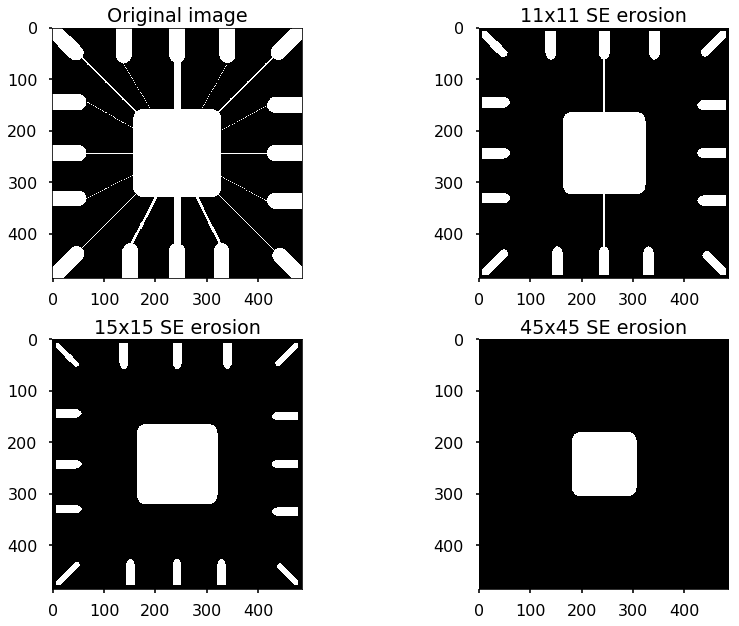

In [257]:
source = np.invert(imageio.imread('./Project 6 images/Fig0905(a)(wirebond-mask).tif'))

eleven = morphology.binary_erosion(source, np.ones((11, 11)))
fifteen = morphology.binary_erosion(source, np.ones((15, 15)))
fourtyfive = morphology.binary_erosion(source, np.ones((45, 45)))

plt.subplot(2, 2, 1)
plt.imshow(source)
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(eleven)
plt.title('11x11 SE erosion')
plt.subplot(2, 2, 3)
plt.imshow(fifteen)
plt.title('15x15 SE erosion')
plt.subplot(2, 2, 4)
plt.imshow(fourtyfive)
plt.title('45x45 SE erosion')
plt.tight_layout()
plt.show()

## Question 2

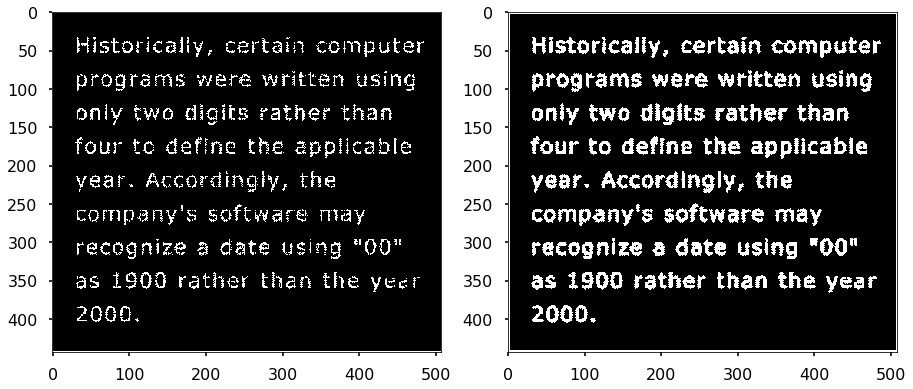

In [73]:
source = imageio.imread('./Project 6 images/Fig0907(a)(text_gaps_1_and_2_pixels).tif')
structuring_element = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]

result = morphology.binary_dilation(source, structuring_element)

plt.subplot(1, 2, 1)
plt.imshow(source)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.tight_layout()
plt.show()

## Question 3

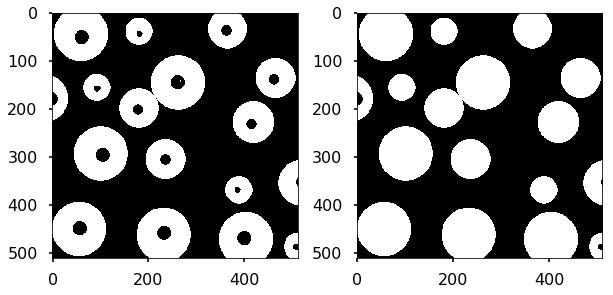

In [317]:
source = imageio.imread('./Project 6 images/Fig0916(a)(region-filling-reflections).tif')
source = np.where(color.rgb2gray(source) > .5, 1., 0.)

complement = 1 - source

marker = np.zeros(source.shape)
marker[0, :] = 1 - source[0, :]
marker[511, :] = 1 - source[511, :]
marker[:, 0] = 1 - source[:, 0]
marker[:, 511] = 1 - source[:, 511]

result = morphology.reconstruction(marker, complement, 'dilation')

plt.subplot(1, 3, 1)
plt.imshow(source)
plt.subplot(1, 3, 2)
plt.imshow(1 - result)
plt.tight_layout()
plt.show()

I'm really not sure why the holes on the edge of the image arent getting filled... It seems logical to me that it's a problem with the marker but the marker has the correct values.

## Question 4

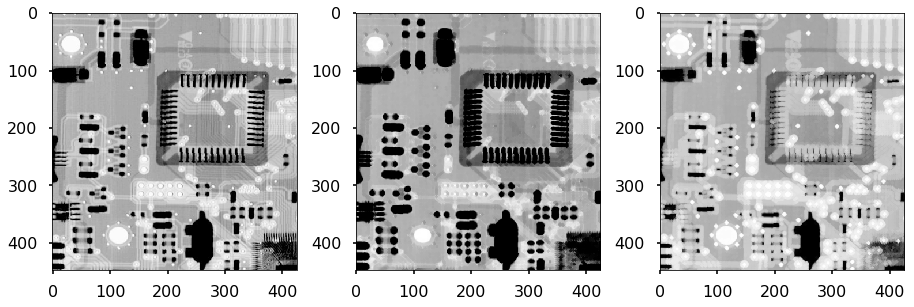

In [298]:
source = imageio.imread('./Project 6 images/Fig0935(a)(ckt_board_section).tif')

eroded = morphology.erosion(source, morphology.disk(radius=2))
dilated = morphology.dilation(source, morphology.disk(radius=2))

plt.subplot(1, 3, 1)
plt.imshow(source)
plt.subplot(1, 3, 2)
plt.imshow(eroded)
plt.subplot(1, 3, 3)
plt.imshow(dilated)
plt.tight_layout()
plt.show()

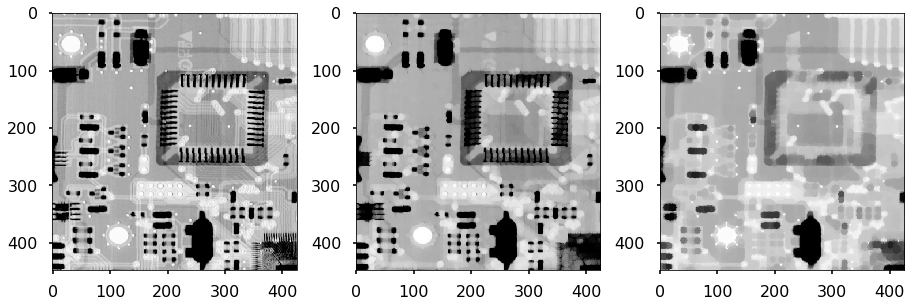

In [299]:
source = imageio.imread('./Project 6 images/Fig0937(a)(ckt_board_section).tif')

opened = morphology.opening(source, morphology.disk(radius=3))
closed = morphology.closing(source, morphology.disk(radius=5))

plt.subplot(1, 3, 1)
plt.imshow(source)
plt.subplot(1, 3, 2)
plt.imshow(opened)
plt.subplot(1, 3, 3)
plt.imshow(closed)
plt.tight_layout()
plt.show()

## Question 5

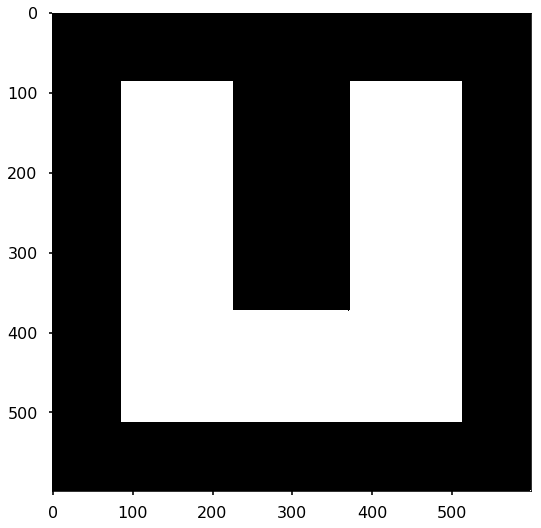

In [77]:
source = imageio.imread('./Project 6 images/FigP0905(top).tif')
source = np.where(source > 128, True, False) #Threshold to binary image for processing

plt.imshow(source)
plt.show()

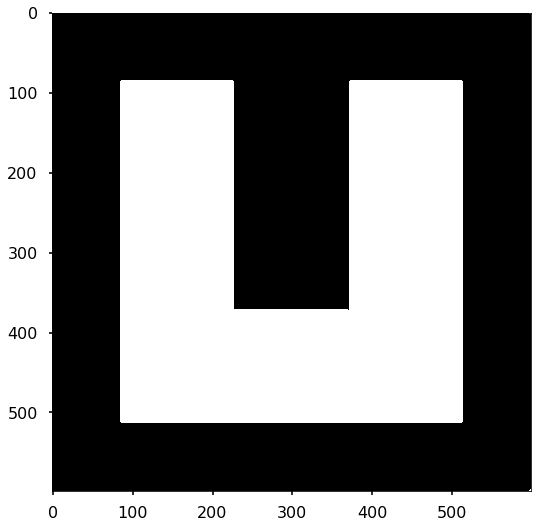

In [79]:
plt.imshow(morphology.binary_dilation(source, [[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
plt.show()


## Question 6

In this particular case the combination of erosion and dilation was able to reproduce the original image since the structuring element can cover the entire 15x15 square. If the structuring element did not cover 100% of the original shape during erosion then reversal would not be possible. The erosion reduced each 15x15 square to 4x4 and the dilation perfectly reverses this process by turning 4x4 squares into 15x15 squares.


If I were tasked with counting the number of each size square, I would probably accomplish this using a series of hit-or-miss transforms. This method would not work if the squares were touching.

## Question 7

There are many permutations of hit-or-miss transform that will uniquely identify the 'T' in the image. One example using the entire structuring element puts the origin of the SE in the center. The resulting image would be a single '1' pixel at the same point on the 'T' as the origin of the structuring element.

## Question 8

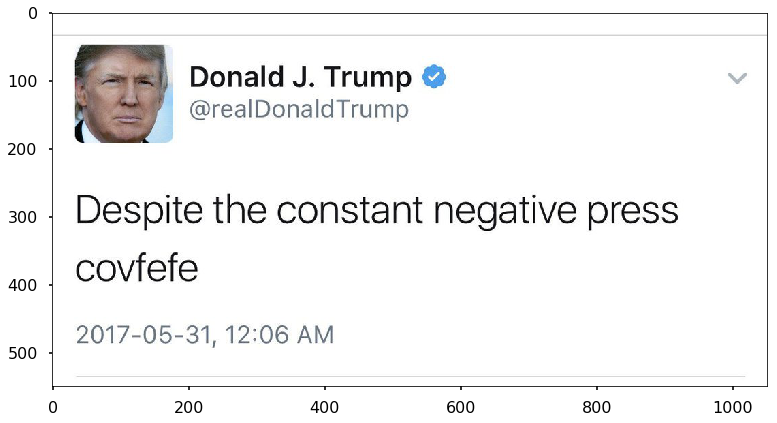

In [252]:
covfefe = imageio.imread('./Project 6 images/covfefe.jpg')
plt.imshow(covfefe)
plt.show()

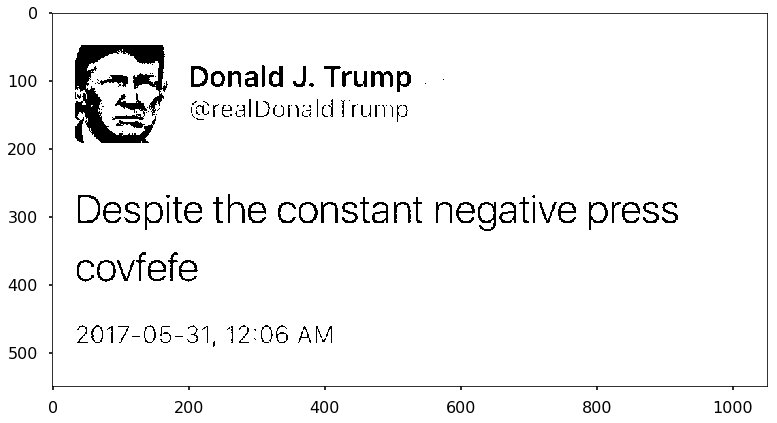

In [253]:
covfefe_binary = np.where(color.rgb2gray(covfefe) > .5, True, False)
plt.imshow(covfefe_binary)
plt.show()

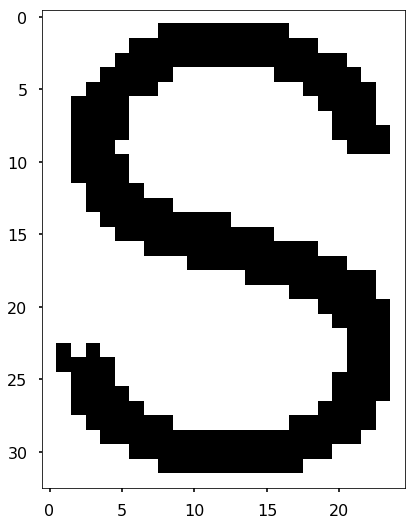

In [254]:
structuring_element = covfefe_binary[278:311, 105:130]

plt.imshow(structuring_element)
plt.show()

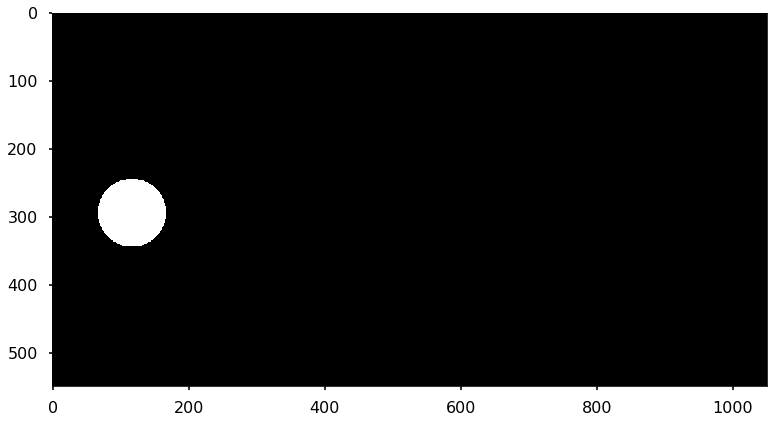

True


In [255]:
result = morphology.reconstruction(covfefe_binary, structuring_element)
plt.imshow(morphology.binary_dilation(result, morphology.disk(radius=50)))
plt.show()
print(np.any(result == True))

## Question 9

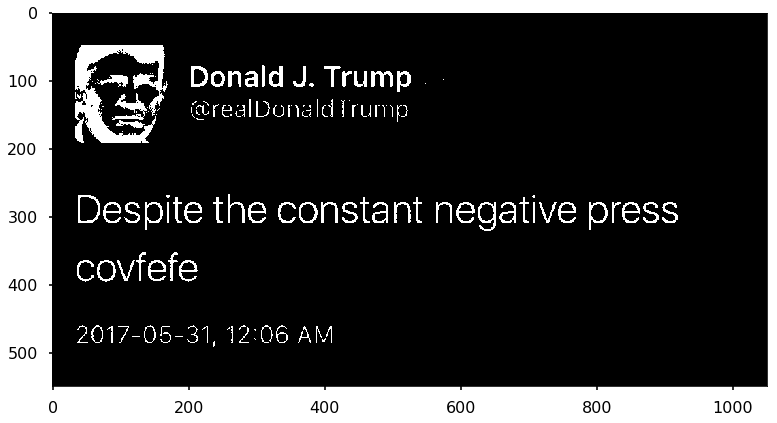

In [242]:
covfefe = imageio.imread('./Project 6 images/covfefe.jpg')
covfefe = np.where(color.rgb2gray(binary) > .5, 1., 0.)
plt.imshow(covfefe)
plt.show()

SciKit Image does not have an equivalent for bwmorph('remove') so I wrote one.

In [243]:
def bwmorph_remove(image):
    result = np.zeros(image.shape)
    for point, value in np.ndenumerate(image):
        y, x = point[0], point[1]
        n0 = image[(y + 1) % image.shape[0], x]
        n1 = image[(y - 1) % image.shape[0], x]
        n2 = image[y, (x + 1) % image.shape[1]]
        n3 = image[y, (x - 1) % image.shape[1]]
        if n0 and n1 and n2 and n3:
            result[point] = 0.
        else:
            result[point] = value
    return result

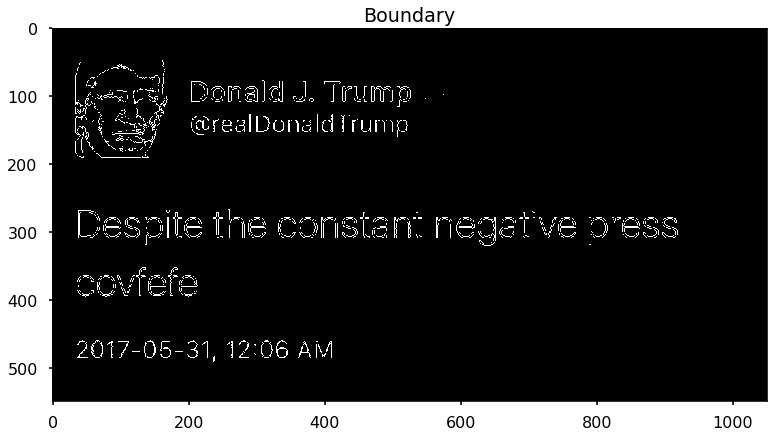

In [244]:
plt.imshow(bwmorph_remove(covfefe))
plt.title('Boundary')
plt.show()

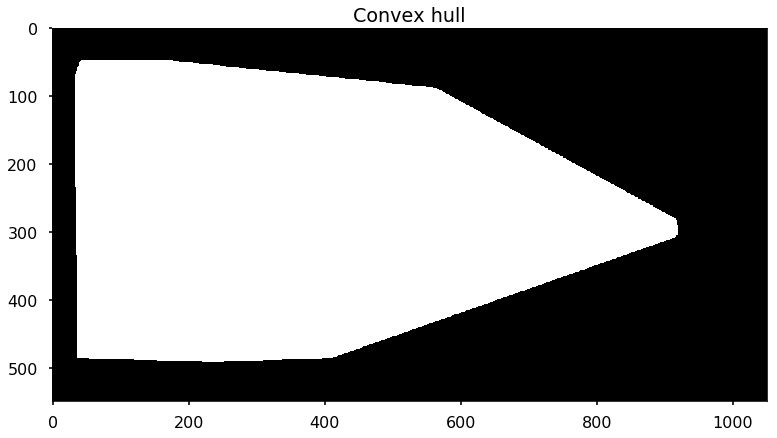

In [245]:
plt.imshow(morphology.convex_hull_image(covfefe))
plt.title('Convex hull')
plt.show()

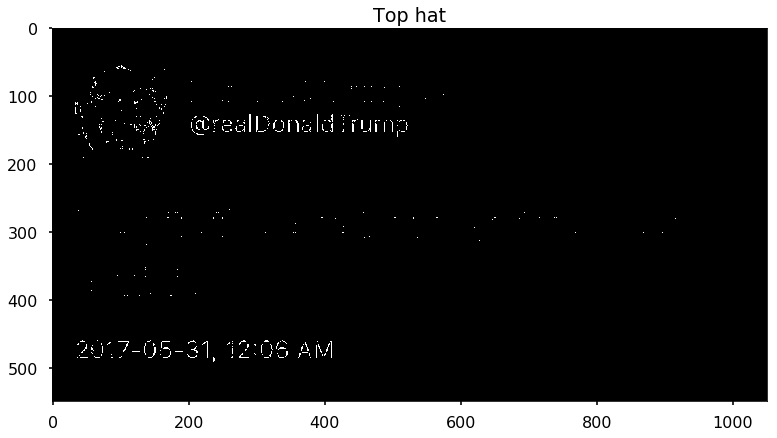

In [246]:
plt.imshow(morphology.white_tophat(covfefe))
plt.title('Top hat')
plt.show()

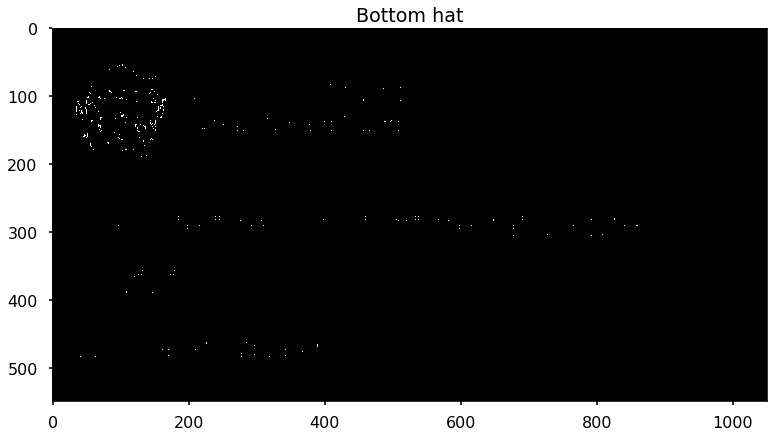

In [251]:
plt.imshow(morphology.black_tophat(covfefe))
plt.title('Bottom hat')
plt.show()

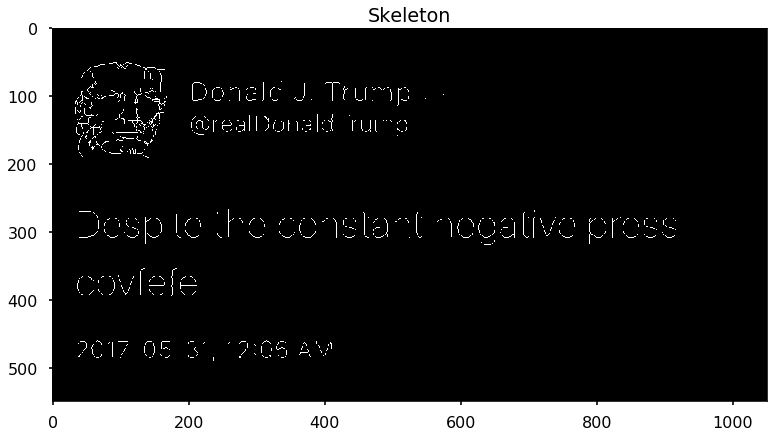

In [250]:
plt.imshow(morphology.skeletonize(covfefe))
plt.title('Skeleton')
plt.show()

## Question 10

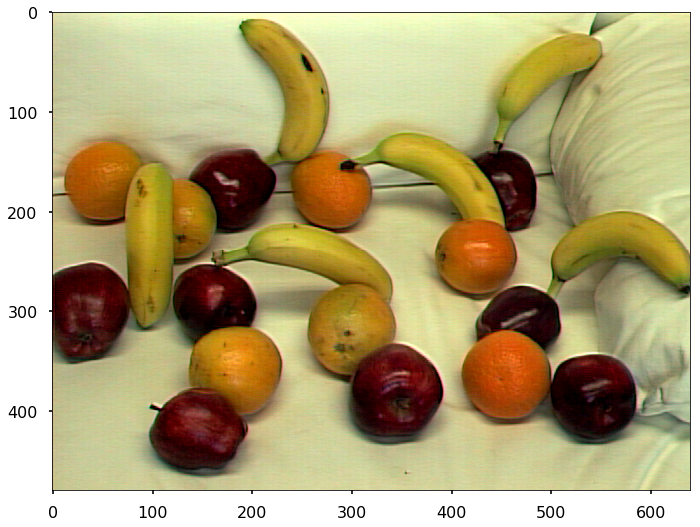

In [261]:
fruit =  imageio.imread('./Project 6 images/fruit.tiff')
plt.imshow(fruit)
plt.show()